# INSTALLING LIBRARIES


In [ ]:
conda install tensorflow


In [ ]:
conda install matplotlib

In [ ]:
conda install libopencv

In [ ]:
conda install scipy

In [ ]:
conda install -c conda-forge opencv python=3.7.4


In [31]:
pip install --upgrade opencv-contrib-python 


     ---------------------------------------- 44.9/44.9 MB 2.8 MB/s eta 0:00:00


# IMPORTING NECESSARY LIBRARIES

In [4]:
import cv2


In [5]:
import tensorflow as tf
import numpy
import matplotlib
from matplotlib import pyplot as plt
import os

In [6]:
dir='data'

# READING IMAGE USING CV2 AND DISPLYING IT VIA PYPLOT

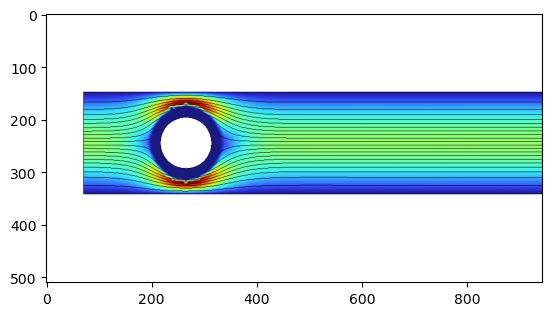

In [7]:
imgl=cv2.imread(os.path.join(dir,'laminar','laminar5.png'))
imgl.shape
plt.imshow(cv2.cvtColor(imgl,cv2.COLOR_BGR2RGB))
plt.show()

# SETTING THE DIRECTORY WHICH CONTAINS THE DATA SET

In [8]:
for image_class in os.listdir(dir):
    for image in os.listdir(os.path.join(dir,image_class)):
        image_path=os.path.join(dir,image_class,image)
        img=cv2.imread(image_path)
        

# Importing data using keras

In [21]:
data=tf.keras.utils.image_dataset_from_directory('data',batch_size=30,image_size=(256,512))

Found 300 files belonging to 2 classes.


In [22]:
data_iterator=data.as_numpy_iterator()

In [23]:
batch=data_iterator.next()

In [24]:
batch[0].shape

(30, 256, 512, 3)

# PLOTTING IMAGES AND OBSERVING THE LABLING OF DATASET
## Here turbulent flow is assigned 1 and laminar flow is assigned 0

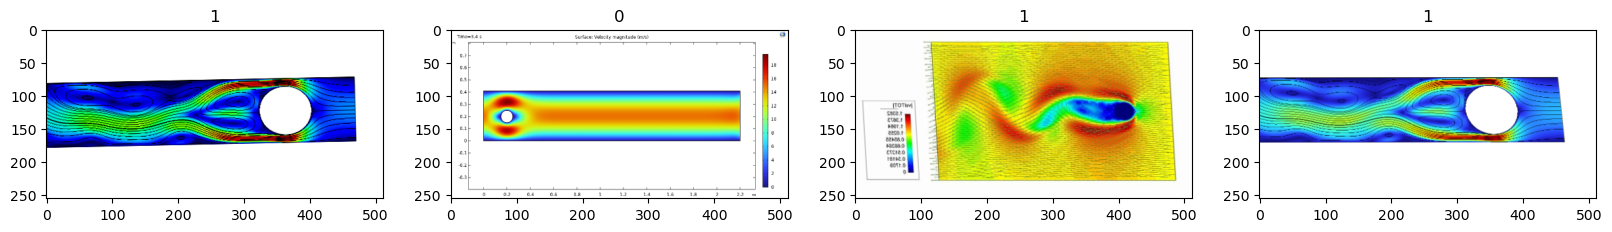

In [25]:
img, ax=plt.subplots(ncols=4, figsize=(20,20))
for idx,img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])
    

# Mapping the images with their corresponding labels using lambda function and scaling images
## A lambda operator or lambda function is used for creating small, one-time, anonymous function objects in Python,in our case, a tuple.

In [26]:
data=data.map(lambda x,y: (x/255, y))


In [27]:
scaled_iterator=data.as_numpy_iterator()


In [28]:
batch=scaled_iterator.next()

In [29]:
batch[0].max()

1.0

# SETTING THE SIZE OF TRAINING, VALIDATION, AND TEST DATA

In [30]:
train_size=6
val_size=3
test_size=1

In [31]:
train=data.take(train_size)
val=data.skip(train_size).take(val_size)
test=data.skip(train_size+val_size).take(test_size)

In [32]:
len(train)

6

# CREATING AN CNN MODEL USING TENSORFLOW

In [33]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,Dense,Flatten,MaxPooling2D,Dropout,AveragePooling2D,concatenate

In [151]:
model=Sequential()

In [152]:

model.add(Conv2D(64,(4,4),2, activation='relu' ,input_shape=(256,512,3)))
model.add(MaxPooling2D())

model.add(Conv2D(96,(3,3),2, activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(96,(3,3),2, activation='relu'))
model.add(Conv2D(96,(3,3),1, activation='relu'))
model.add(Conv2D(64,(3,3),1, activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dense(1,activation='sigmoid'))


In [153]:
model.compile('adam',loss=tf.losses.BinaryCrossentropy(),metrics=['accuracy'])

In [154]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_47 (Conv2D)          (None, 127, 255, 64)      3136      
                                                                 
 max_pooling2d_25 (MaxPoolin  (None, 63, 127, 64)      0         
 g2D)                                                            
                                                                 
 conv2d_48 (Conv2D)          (None, 31, 63, 96)        55392     
                                                                 
 max_pooling2d_26 (MaxPoolin  (None, 15, 31, 96)       0         
 g2D)                                                            
                                                                 
 conv2d_49 (Conv2D)          (None, 7, 15, 96)         83040     
                                                                 
 conv2d_50 (Conv2D)          (None, 5, 13, 96)        

# CREATING A LOG DIRECTORY TO STORE OUR MODEL 

In [155]:
logdir='log'

In [131]:
tensorboard_callback=tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [156]:
hist=model.fit(train, epochs=30, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/30
6/6 [==============================] - 14s 2s/step - loss: 0.6851 - accuracy: 0.5333 - val_loss: 0.6372 - val_accuracy: 0.5889
Epoch 2/30
6/6 [==============================] - 11s 2s/step - loss: 0.6482 - accuracy: 0.6111 - val_loss: 0.6383 - val_accuracy: 0.5556
Epoch 3/30
6/6 [==============================] - 13s 2s/step - loss: 0.5465 - accuracy: 0.7111 - val_loss: 0.4663 - val_accuracy: 0.7889
Epoch 4/30
6/6 [==============================] - 15s 2s/step - loss: 0.3593 - accuracy: 0.8333 - val_loss: 0.2531 - val_accuracy: 0.9333
Epoch 5/30
6/6 [==============================] - 10s 2s/step - loss: 0.2786 - accuracy: 0.8611 - val_loss: 0.3062 - val_accuracy: 0.8667
Epoch 6/30
6/6 [==============================] - 14s 2s/step - loss: 0.2262 - accuracy: 0.8944 - val_loss: 0.1573 - val_accuracy: 0.9556
Epoch 7/30
6/6 [==============================] - 11s 2s/step - loss: 0.1805 - accuracy: 0.9611 - val_loss: 0.1114 - val_accuracy: 0.9333
Epoch 8/30
6/6 [==================

# PLOTING LOSS FUNCTION AND VALIDATION LOSS VS EPOCHS

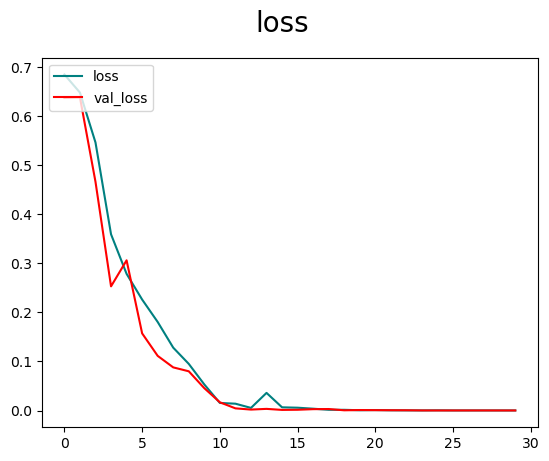

In [157]:
fig=plt.figure()
plt.plot(hist.history['loss'],color='teal',label='loss')
plt.plot(hist.history['val_loss'],color='red',label='val_loss')
fig.suptitle('loss',fontsize='20')
plt.legend(loc='upper left')
plt.show()


# PLOTTING ACCURACY

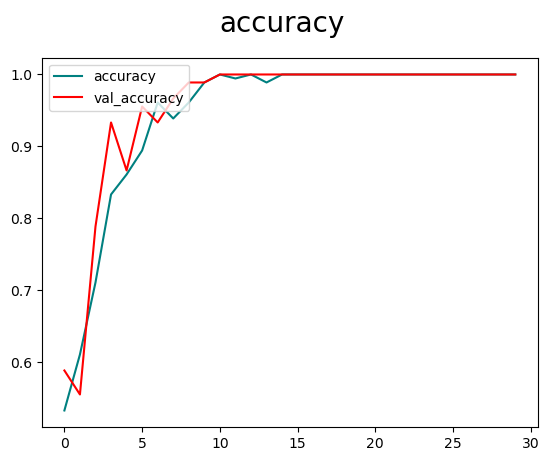

In [158]:
fig=plt.figure()
plt.plot(hist.history['accuracy'],color='teal',label='accuracy')
plt.plot(hist.history['val_accuracy'],color='red',label='val_accuracy')
fig.suptitle('accuracy',fontsize='20')
plt.legend(loc='upper left')
plt.show()

In [159]:
from tensorflow.keras.metrics import Recall, Precision, BinaryAccuracy

In [160]:
pre= Precision()
recall= Recall()
acc= BinaryAccuracy()

In [161]:
for batch in test.as_numpy_iterator():
    x, y= batch
    Y=model.predict(x)
    pre.update_state(y,Y)
    recall.update_state(y,Y)
    acc.update_state(y,Y)

1/1 [==============================] - 0s 451ms/step


In [162]:
print(f'precision: {pre.result().numpy()},recall: {recall.result().numpy()} ,accuracy: {acc.result().numpy()}')

precision: 1.0,recall: 1.0 ,accuracy: 1.0


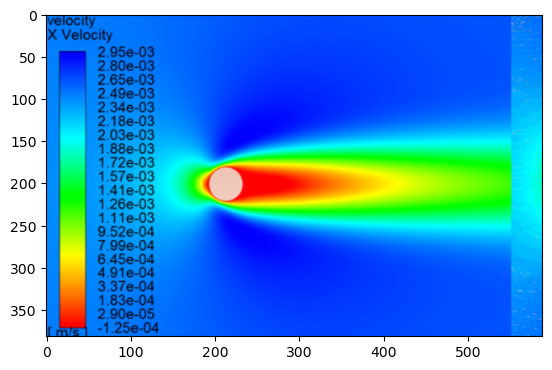

In [163]:
img=cv2.imread('LAMINAR_TEST.png')
plt.imshow(img)
plt.show()

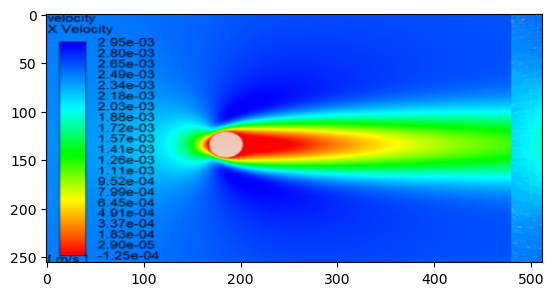

In [164]:
resized_image= tf.image.resize(img,(256,512))
plt.imshow(resized_image.numpy().astype(int))
plt.show()

In [165]:
numpy.expand_dims(resized_image,0).shape

(1, 256, 512, 3)

# TESTING ON RANDOM INTERNET IMAGES TO CHECK OVERFITTING OF DATA

In [177]:
result= model.predict(numpy.expand_dims(resized_image/255, 0))
if result>=0.5:
    print('TURBULENT FLOW')
else:
    print('LAMINAR FLOW')

1/1 [==============================] - 0s 61ms/step
TURBULENT FLOW


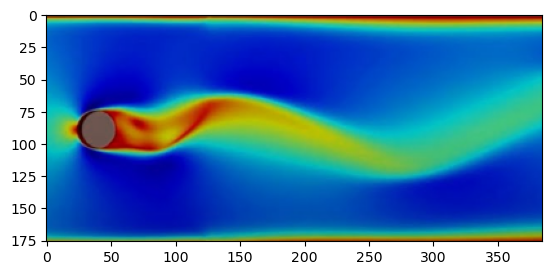

In [173]:
img1=cv2.imread('TURBULENT_TEST.png')

plt.imshow(img1)
plt.show()

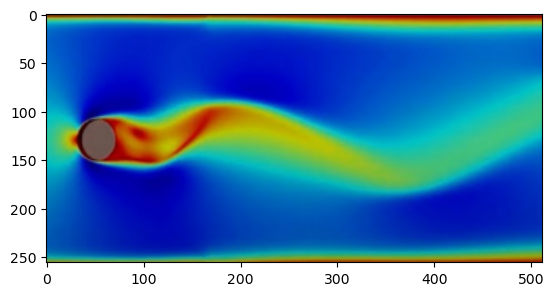

In [174]:
resized_image= tf.image.resize(img1,(256,512))
plt.imshow(resized_image.numpy().astype(int))
plt.show()

In [175]:
result= model.predict(numpy.expand_dims(resized_image/255, 0))
if result>=0.5:
    print('TURBULENT FLOW')
else:
    print('LAMINAR FLOW')

1/1 [==============================] - 0s 33ms/step
[[0.7300997]]
TURBULENT FLOW
